# Project 2: Topic Classification

In this project, you'll work with text data from newsgroup posts on a variety of topics. You'll train classifiers to distinguish posts by topics inferred from the text. Whereas with digit classification, where each input is relatively dense (represented as a 28x28 matrix of pixels, many of which are non-zero), here each document is relatively sparse (represented as a bag-of-words). Only a few words of the total vocabulary are active in any given document. The assumption is that a label depends only on the count of words, not their order.

The `sklearn` documentation on feature extraction may be useful:
http://scikit-learn.org/stable/modules/feature_extraction.html

Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on Slack, but <b> please prepare your own write-up with your own code. </b>

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import re
import numpy as np
import matplotlib.pyplot as plt

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# SK-learn library for importing the newsgroup data.
from sklearn.datasets import fetch_20newsgroups

# SK-learn libraries for feature extraction from text.
from sklearn.feature_extraction.text import *

import nltk

Load the data, stripping out metadata so that only textual features will be used, and restricting documents to 4 specific topics. By default, newsgroups data is split into training and test sets, but here the test set gets further split into development and test sets.  (If you remove the categories argument from the fetch function calls, you'd get documents from all 20 topics.)

In [2]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train',
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)
newsgroups_test  = fetch_20newsgroups(subset='test',
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)

num_test = int(len(newsgroups_test.target) / 2)
test_data, test_labels   = newsgroups_test.data[num_test:], newsgroups_test.target[num_test:]
dev_data, dev_labels     = newsgroups_test.data[:num_test], newsgroups_test.target[:num_test]
train_data, train_labels = newsgroups_train.data, newsgroups_train.target

print('training label shape:', train_labels.shape)
print('dev label shape:',      dev_labels.shape)
print('test label shape:',     test_labels.shape)
print('labels names:',         newsgroups_train.target_names)

training label shape: (2034,)
dev label shape: (676,)
test label shape: (677,)
labels names: ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']


### Part 1:

For each of the first 5 training examples, print the text of the message along with the label.

In [3]:
def P1(num_examples=5):
### STUDENT START ###

# Going through the number of examples defined by the function's parameter "num_examples", printing text and label:
    for i in range(num_examples):
        print("\nText of the Message, Example", (i+1), ":\n", train_data[i], "\nRespective Label of Example", (i+1), ":", train_labels[i])
    
### STUDENT END ###
P1()


Text of the Message, Example 1 :
 Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych 
Respective Label of Example 1 : 1

Text of the Message, Example 2 :
 

Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a whole bunch of
folks with him, children and all, to satisfy his delusional mania. Jim
Jones, circa 1993.


Nope - fruitcakes like Koresh have been demons

### Part 2:

Transform the training data into a matrix of **word** unigram feature vectors.  What is the size of the vocabulary? What is the average number of non-zero features per example?  What is the fraction of the non-zero entries in the matrix?  What are the 0th and last feature strings (in alphabetical order)?<br/>
_Use `CountVectorization` and its `.fit_transform` method.  Use `.nnz` and `.shape` attributes, and `.get_feature_names` method._

Now transform the training data into a matrix of **word** unigram feature vectors using your own vocabulary with these 4 words: ["atheism", "graphics", "space", "religion"].  Confirm the size of the vocabulary. What is the average number of non-zero features per example?<br/>
_Use `CountVectorization(vocabulary=...)` and its `.transform` method._

Now transform the training data into a matrix of **character** bigram and trigram feature vectors.  What is the size of the vocabulary?<br/>
_Use `CountVectorization(analyzer=..., ngram_range=...)` and its `.fit_transform` method._

Now transform the training data into a matrix of **word** unigram feature vectors and prune words that appear in fewer than 10 documents.  What is the size of the vocabulary?<br/>
_Use `CountVectorization(min_df=...)` and its `.fit_transform` method._

Now again transform the training data into a matrix of **word** unigram feature vectors. What is the fraction of words in the development vocabulary that is missing from the training vocabulary?<br/>
_Hint: Build vocabularies for both train and dev and look at the size of the difference._

Notes:
* `.fit_transform` makes 2 passes through the data: first it computes the vocabulary ("fit"), second it converts the raw text into feature vectors using the vocabulary ("transform").
* `.fit_transform` and `.transform` return sparse matrix objects.  See about them at http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.csr_matrix.html.  

In [4]:
def P2():
### STUDENT START ###

    # Using CountVectorizer, fit and transform train data:
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(train_data)
    
    # Creating a vocabulary and checking its size:
    vocabulary = vectorizer.get_feature_names()
    print("1.) Transform the training data into a matrix of word unigram feature vectors")
    print("    *The size of Vocabulary is: ", len(vocabulary))
    
    # Converting train data into an array, saving in the variable 'vocab_features':
    vocab_features = X.toarray()
    
    # Calculating the average number of non-zero features per example:
    avg_nnz_per_ex = round(np.count_nonzero(vocab_features)/len(train_data),4)
    print("    *The average number of non-zero features per example is: ", avg_nnz_per_ex)
    
    # Calculating what fraction of the entries in the matrix are non-zero:
    print("    *The fraction of the entries in the matrix that are non-zero are: ", round(np.count_nonzero(vocab_features)/(np.shape(vocab_features)[0]*np.shape(vocab_features)[1]),4))
    

    # Sorting feature strings in vocabulary in alphabetical order:
    vocabulary_sorted = sorted(vocabulary)
    print("    *The 0th and last feature strings (in alphabetical order) are: ", '"', vocabulary_sorted[0], '"', " and ", '"', vocabulary_sorted[-1], '"')
    
    # Creating my own vocabulary:
    our_words = ["atheism", "graphics", "space", "religion"]
    
    # Vectorizing new vocabulary, fitting and transforming:
    vectorizer2 = CountVectorizer(vocabulary = our_words)
    X2 = vectorizer2.fit_transform(train_data)
    vocab_features2 = X2.toarray()
    
    #Confirming the training vectors are appropriately shaped:
    #print("Training Vectors Shape: ", vocab_features2.shape)
    
    # Calculating the new average number of non-zero features per example:
    avg_nnz_per_ex2 = round(np.count_nonzero(vocab_features2)/len(train_data),4)
    print("2.) transform the training data into a matrix of word unigram feature vectors using your own vocabulary")
    print("    *The average number of non-zero features per example is: ", avg_nnz_per_ex2)
    
    # Extracting bigram and trigram character features with 'ngram_range':
    vectorizer3 = CountVectorizer(analyzer = 'char', ngram_range = (2,3))
    
    # Fitting and transforming 'train_data' to create new vocabulary, extracting feature names to define size:
    X3 = vectorizer3.fit_transform(train_data)
    vocabulary3 = vectorizer3.get_feature_names()
    print("3.) Now transform the training data into a matrix of character bigram and trigram feature vectors")
    print("    *The size of the new Vocabulary is: ", len(vocabulary3))
    
    # Pruning words that appear in fewer than 10 documents with 'min_df' argument:
    vectorizer4 = CountVectorizer(min_df = 10)
    A = vectorizer4.fit_transform(train_data)
    vocabulary4 = vectorizer4.get_feature_names()
    print("4.) Now transform the training data into a matrix of word unigram feature vectors and prune words that appear in fewer than 10 documents")
    print("    *The size of the new Vocabulary is: ", len(vocabulary4))
    
    # Using CountVectorizer, fit and transform train data and dev data:
    vectorizer_train = CountVectorizer()
    vectorizer_dev = CountVectorizer()
    vect_train = vectorizer_train.fit_transform(train_data)
    vect_dev = vectorizer_dev.fit_transform(dev_data)
    
    # Creating a vocabulary and checking its size for both train and dev data:
    vocab_train = vectorizer_train.get_feature_names()
    vocab_dev = vectorizer_dev.get_feature_names()
    missing=[i for i in vocab_dev if i not in vocab_train]
    print("5.) Now again transform the training data into a matrix of word unigram feature vectors")
    print("    *The fraction of the words in the dev data that are missing from the vocabulary is: ", round((len(missing) / len(vocab_dev)),4))
    

### STUDENT END ###
P2()

1.) Transform the training data into a matrix of word unigram feature vectors
    *The size of Vocabulary is:  26879
    *The average number of non-zero features per example is:  96.706
    *The fraction of the entries in the matrix that are non-zero are:  0.0036
    *The 0th and last feature strings (in alphabetical order) are:  " 00 "  and  " zyxel "
2.) transform the training data into a matrix of word unigram feature vectors using your own vocabulary
    *The average number of non-zero features per example is:  0.2684
3.) Now transform the training data into a matrix of character bigram and trigram feature vectors
    *The size of the new Vocabulary is:  35478
4.) Now transform the training data into a matrix of word unigram feature vectors and prune words that appear in fewer than 10 documents
    *The size of the new Vocabulary is:  3064
5.) Now again transform the training data into a matrix of word unigram feature vectors
    *The fraction of the words in the dev data that are 

### Part 3:

Transform the training and development data to matrices of word unigram feature vectors.

1. Produce several k-Nearest Neigbors models by varying k, including one with k set to optimize f1 score.  For each model, show the k value and f1 score.
1. Produce several Naive Bayes models by varying smoothing (alpha), including one with alpha set approximately to optimize f1 score.  For each model, show the alpha value and f1 score.
1. Produce several Logistic Regression models by varying L2 regularization strength (C), including one with C set approximately to optimize f1 score.  For each model, show the C value, f1 score, and sum of squared weights for each topic.

* Why doesn't k-Nearest Neighbors work well for this problem?
* Why doesn't Logistic Regression work as well as Naive Bayes does?
* What is the relationship between logistic regression's sum of squared weights vs. C value?

Notes:
* Train on the transformed training data.
* Evaluate on the transformed development data.
* You can use `CountVectorizer` and its `.fit_transform` and `.transform` methods to transform data.
* You can use `KNeighborsClassifier(...)` to produce a k-Nearest Neighbors model.
* You can use `MultinomialNB(...)` to produce a Naive Bayes model.
* You can use `LogisticRegression(C=..., solver="liblinear", multi_class="auto")` to produce a Logistic Regression model.
* You can use `LogisticRegression`'s `.coef_` method to get weights for each topic.
* You can use `metrics.f1_score(..., average="weighted")` to compute f1 score.

In [5]:
def P3():
### STUDENT START ###

    # Using vectorizer and fit/transform data:
    vectorizer = CountVectorizer()
    train_vect = vectorizer.fit_transform(train_data)
    dev_vect = vectorizer.transform(dev_data)

    # Using K-Nearest Neighbors Classifier

    # Creating classifier and iterating through all 'k' values, capturing F1_score values:
    k_list = [i for i in range(1,200)]
    f1_list = []
    for k in k_list:
        clf1 = KNeighborsClassifier(n_neighbors = k)
        clf1.fit(train_vect, train_labels)
        pred1 = clf1.predict(dev_vect)
        f1_score = metrics.f1_score(dev_labels, pred1, average='weighted')
        f1_list.append(f1_score)

    # Identifying the maximum value of F1 and its respective 'k' value:
    max_f1 = max(f1_list)
    index = f1_list.index(max_f1)
    best_k = index + 1
    print("Using K-Nearest Neighbors Classifier")
    print("The best value of k is: ", best_k, "Max f1-score: ", round(max_f1,4), '\n')

    # Using Multinomial Naive Bayes Classifier:

    # Creating classifier and iterating through all 'alpha' values, capturing F1_score values:
    alphas = [i*0.001 for i in range(1000)]
    f1_list = []
    for alpha in alphas:
        clf2 = MultinomialNB(alpha = alpha)
        clf2.fit(train_vect, train_labels)
        pred2 = clf2.predict(dev_vect)
        f1_score = metrics.f1_score(dev_labels, pred2, average='weighted')
        f1_list.append(f1_score)

    # Identifying the maximum value of F1 and its respective 'alpha' value:
    max_f1 = max(f1_list)
    index = f1_list.index(max_f1)
    best_alpha = (index + 1)/1000
    print("Using Multinomial Naive Bayes Classifier")
    print("The best value of alpha is: ", best_alpha, "Max f1-score: ", round(max_f1,4), '\n')

    # Using Logistic Regression Classifier:

    # Creating classifier and iterating through all 'C' values, capturing F1_score values:
    print("Using Logistic Regression Classifier")
    c_values = [i*0.01 for i in range(1,100)]

    f1_list = []
    print("C Value",", ",categories,", ","F1-Score")
    for c in c_values:
        clf3 = LogisticRegression(C = c, solver='liblinear', multi_class="auto")
        clf3.fit(train_vect, train_labels)
        
        # Sum of the squared weight values for each class:
        weights_sqrd = np.square(clf3.coef_).sum(axis=1)
        
        pred3 = clf3.predict(dev_vect)
        f1_score = metrics.f1_score(dev_labels, pred3, average='weighted')
        f1_list.append(f1_score)
        print(c, ", ", np.round(weights_sqrd,4), ", ", round(f1_score,4))

    # Identifying the maximum value of F1 and its respective 'C' value:
    max_f1 = max(f1_list)
    index = f1_list.index(max_f1)
    best_c = index/100
    
    print("The best value of C is: ", best_c, "Max f1-score: ", round(max_f1,4)) 
    
    
### STUDENT END ###

P3()

Using K-Nearest Neighbors Classifier
The best value of k is:  112 Max f1-score:  0.4789 



C:\Users\George\anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


Using Multinomial Naive Bayes Classifier
The best value of alpha is:  0.263 Max f1-score:  0.7919 

Using Logistic Regression Classifier
C Value ,  ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space'] ,  F1-Score
0.01 ,  [2.5415 2.9397 2.8625 2.25  ] ,  0.6647
0.02 ,  [5.4708 5.8762 5.9409 4.6683] ,  0.6641
0.03 ,  [8.3982 8.6188 8.9263 7.0977] ,  0.6698
0.04 ,  [11.2702 11.2061 11.8104  9.4971] ,  0.6831
0.05 ,  [14.0732 13.6691 14.6041 11.8607] ,  0.6867
0.06 ,  [16.8089 16.0261 17.3145 14.1792] ,  0.6902
0.07 ,  [19.4768 18.2949 19.9481 16.4538] ,  0.6907
0.08 ,  [22.0829 20.4812 22.5152 18.6853] ,  0.6925
0.09 ,  [24.6368 22.5977 25.0196 20.8791] ,  0.6948
0.1 ,  [27.1328 24.6588 27.4579 23.0209] ,  0.6966
0.11 ,  [29.5754 26.6545 29.8462 25.1348] ,  0.6968
0.12 ,  [31.9729 28.6018 32.1818 27.212 ] ,  0.7074
0.13 ,  [34.3285 30.5034 34.4674 29.2523] ,  0.7105
0.14 ,  [36.6585 32.366  36.7152 31.2574] ,  0.7105
0.15 ,  [38.9147 34.186  38.909  33.2244] ,  0.7092
0.16 

ANSWER:

K Nearest Neighbors don't work well here because it assumes each unigram is equally important, while some unigrams are more important than others.

Logistic Regression doesn't work well here because ~25% of the unigram in the dev data is missing from training data, it cannot train on features that don't exist in the training data. 

Naive Bayes works the best here, because it can give missing features a smoothing probability derived from alpha. Something logistic regression cannot do.  

The sum of the squared weight values for each class tends to increase as the value of the C parameter also increases. This makes sense as C is the inverse of regularization, meaning the higher the value of C, the less penalty we put on the weights. It is important to notice though that higher C is not necessarily better or worse. In our case, the optimal value of C is in the middle of the tested range.

### Part 4:

Transform the data to a matrix of word **bigram** feature vectors.  Produce a Logistic Regression model.  For each topic, find the 5 features with the largest weights (that's 20 features in total).  Show a 20 row (features) x 4 column (topics) table of the weights.

Do you see any surprising features in this table?

Notes:
* Train on the transformed training data.
* You can use `CountVectorizer` and its `.fit_transform` method to transform data.
* You can use `LogisticRegression(C=0.5, solver="liblinear", multi_class="auto")` to produce a Logistic Regression model.
* You can use `LogisticRegression`'s `.coef_` method to get weights for each topic.
* You can use `np.argsort` to get indices sorted by element value. 

In [22]:
def P4():
### STUDENT START ###
    
    # Creating vectorizers for unigram and bigram features:
    vectorizer_unigram = CountVectorizer()
    vectorizer_bigram = CountVectorizer(analyzer = 'word', ngram_range = (2,2))

    # Defining the 'CreateTable' function, to be called later on using both vectorizers:
    def CreateTable(vectorizer):
        
        # Creating a Logistic Regression model:
        train_vect = vectorizer.fit_transform(train_data)
        vocabulary = vectorizer.get_feature_names()
        clf4 = LogisticRegression(C=0.5, solver="liblinear", multi_class="auto")
        clf4.fit(train_vect, train_labels)
        
        # Checking the top 5 features with the largest weights for each label:
        indexes = []
        for i in range(4):
            
            # Sorting and grabing the top 5 values using absolute values:
            top5 = clf4.coef_[i].argsort()[-5:]
            
            # Appending the respective indexes in 'indexes' list:
            for index in top5:
                indexes.append(index)
        
        # Printing each word in the vocabulary and its respective categories/label:
        print(["word"]+categories)
        for index in indexes:
            table_row = []
            table_row.append(vocabulary[index])
            for i in range(4):
                weight = clf4.coef_[i][index]
                table_row.append(round(weight,4))
            print(table_row)

    # Calling the function for each vectorizer:
    CreateTable(vectorizer_unigram)
    CreateTable(vectorizer_bigram)
    
### STUDENT END ###
P4()

['word', 'alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
['deletion', 0.7239, -0.2495, -0.2724, -0.2704]
['atheism', 0.7947, -0.3485, -0.3672, -0.377]
['religion', 0.7984, -0.5087, -0.6588, -0.0506]
['bobby', 0.8234, -0.1912, -0.2864, -0.3871]
['atheists', 0.8342, -0.0933, -0.2674, -0.6375]
['computer', 0.0714, 0.8438, -0.5695, -0.3961]
['3d', -0.3035, 0.9415, -0.5711, -0.3176]
['file', -0.2752, 1.059, -0.6827, -0.5061]
['image', -0.4695, 1.1168, -0.6722, -0.381]
['graphics', -0.6408, 1.6265, -1.103, -0.6263]
['spacecraft', -0.2974, -0.3217, 0.7373, -0.2918]
['launch', -0.3776, -0.3966, 0.784, -0.2808]
['nasa', -0.4655, -0.4104, 0.8517, -0.4015]
['orbit', -0.3503, -0.5597, 1.0127, -0.4989]
['space', -1.0613, -1.1157, 1.864, -0.9721]
['order', -0.6493, -0.0656, -0.1241, 0.7428]
['fbi', -0.244, -0.2174, -0.375, 0.7546]
['blood', -0.4287, -0.0968, -0.2306, 0.8469]
['christian', -0.4829, -0.339, -0.2475, 0.9255]
['christians', -0.6074, -0.3154, -0.4043, 0.9293]
['word', 

ANSWER:

Most of the bigram words make sense because they are commonly used together (e.g. "you are", "look up", " the fbi", etc.). Surprisingly, there is one weird bigrams "cheers kent".

Furthermore, some of the largest weights don't fit the class as we would expect, like "comp graphics" having the highest weight in "talk.religion.misc" and not on "comp.graphics" class. Another example is "the moon" and "the space" having a the largest weight for "comp.graphics" than for "sci.space". 

### Part 5:

To improve generalization, it is common to try preprocessing text in various ways before splitting into words. For example, you could try transforming strings to lower case, replacing sequences of numbers with single tokens, removing various non-letter characters, and shortening long words.

Produce a Logistic Regression model (with no preprocessing of text).  Evaluate and show its f1 score and size of the dictionary.

Produce an improved Logistic Regression model by preprocessing the text.  Evaluate and show its f1 score and size of the vocabulary.  Try for an improvement in f1 score of at least 0.02.

How much did the improved model reduce the vocabulary size?

Notes:
* Train on the transformed training data.
* Evaluate on the transformed development data.
* You can use `CountVectorizer(preprocessor=...)` to preprocess strings with your own custom-defined function.
* `CountVectorizer` default is to preprocess strings to lower case.
* You can use `LogisticRegression(C=0.5, solver="liblinear", multi_class="auto")` to produce a logistic regression model.
* You can use `metrics.f1_score(..., average="weighted")` to compute f1 score.
* If you're not already familiar with regular expressions for manipulating strings, see https://docs.python.org/2/library/re.html, and re.sub() in particular.

In [20]:
### STUDENT START ###    
def empty_preprocessor(s):
    return s

def better_preprocessor(s):
    
    # Make all text lower case:
    s = s.lower()
    
    # Remove all non-letter and non-number characters:
    s = re.sub("[^a-zA-Z0-9]", " ", s)
    
    #s = re.sub(r"\s+[a-zA-Z]\s+", " ", s)
        
    # Shortens long words:
    s = re.sub("[a-zA-Z0-9]{15,}", "//1", s)
          
    # Removes two stop words:
    s = re.sub("[\bfor]", "", s)
    s = re.sub("[\ban]", "", s)
    
    # Replaces sequences of numbers with a single '#' token:
    # didn't work
    # s = re.sub('[0-9]+', '#', s)

    return s

### STUDENT END ###

def P5():
### STUDENT START ###

    # No Preprocessing:
    vectorizer = CountVectorizer(preprocessor = empty_preprocessor)
    train_vect = vectorizer.fit_transform(train_data)
    dev_vect = vectorizer.transform(dev_data)
    vocabulary_nopre = vectorizer.get_feature_names()
    print("Original Vocabulary size is: ", len(vocabulary_nopre), '\n')

    # Creating the model and checking F1-score:
    clf5 = LogisticRegression(C=0.5, solver="liblinear", multi_class="auto")
    clf5.fit(train_vect, train_labels)
    pred5 = clf5.predict(dev_vect)
    f1_score = metrics.f1_score(dev_labels, pred5, average='weighted')
    print("F1-score, no pre-processing: ", round(f1_score,4), '\n')

    # With Preprocessing:
    vectorizer = CountVectorizer(preprocessor = better_preprocessor)
    train_vect = vectorizer.fit_transform(train_data)
    dev_vect = vectorizer.transform(dev_data)
    vocabulary_pre = vectorizer.get_feature_names()
    print("New Vocabulary size after pre-processing: ", len(vocabulary_pre), '\n')
    print("Vocabulary was reduced by", len(vocabulary_nopre) - len(vocabulary_pre), "words.", '\n')
    #print(vocabulary_pre)

    # Creating the model and checking F1-score:
    clf6 = LogisticRegression(C=0.5, solver="liblinear", multi_class="auto")
    clf6.fit(train_vect, train_labels)
    pred6 = clf6.predict(dev_vect)
    f1_score = metrics.f1_score(dev_labels, pred6, average='weighted')
    print("F1-score, with better pre-processing: ", round(f1_score,4), '\n')

### STUDENT END ###
P5()

Original Vocabulary size is:  33291 

F1-score, no pre-processing:  0.7069 

New Vocabulary size after pre-processing:  20708 

Vocabulary was reduced by 12583 words. 

F1-score, with better pre-processing:  0.7273 



### Part 6:

The idea of regularization is to avoid learning very large weights (which are likely to fit the training data, but not generalize well) by adding a penalty to the total size of the learned weights. Logistic regression seeks the set of weights that minimizes errors in the training data AND has a small total size. The default L2 regularization computes this size as the sum of the squared weights (as in Part 3 above). L1 regularization computes this size as the sum of the absolute values of the weights. Whereas L2 regularization makes all the weights relatively small, L1 regularization drives many of the weights to 0, effectively removing unimportant features.

For several L1 regularization strengths ...<br/>
* Produce a Logistic Regression model using the **L1** regularization strength.  Reduce the vocabulary to only those features that have at least one non-zero weight among the four categories.  Produce a new Logistic Regression model using the reduced vocabulary and **L2** regularization strength of 0.5.  Evaluate and show the L1 regularization strength, vocabulary size, and f1 score associated with the new model.

Show a plot of f1 score vs. log vocabulary size.  Each point corresponds to a specific L1 regularization strength used to reduce the vocabulary.

How does performance of the models based on reduced vocabularies compare to that of a model based on the full vocabulary?

Notes:
* Train on the transformed training data.
* Evaluate on the transformed development data.
* You can use `LogisticRegression(..., penalty="l1")` to produce a logistic regression model using L1 regularization.
* You can use `LogisticRegression(..., penalty="l2")` to produce a logistic regression model using L2 regularization.
* You can use `LogisticRegression(..., tol=0.015)` to produce a logistic regression model using relaxed gradient descent convergence criteria.  The gradient descent code that trains the logistic regression model sometimes has trouble converging with extreme settings of the C parameter. Relax the convergence criteria by setting tol=.015 (the default is .0001).

F1-score with Full vocabulary and c=0.5 and penalty=L2 is:  0.6981 

F1-score of L2 with Pruned vocabulary by varying c of L1: 
Value of C =  0.1 F1-score =  0.7015 Vocabulary Size:  844
Value of C =  0.2 F1-score =  0.6784 Vocabulary Size:  1472
Value of C =  0.30000000000000004 F1-score =  0.6821 Vocabulary Size:  2048
Value of C =  0.4 F1-score =  0.6682 Vocabulary Size:  2616
Value of C =  0.5 F1-score =  0.6697 Vocabulary Size:  3032
Value of C =  0.6000000000000001 F1-score =  0.6802 Vocabulary Size:  3348
Value of C =  0.7000000000000001 F1-score =  0.6751 Vocabulary Size:  3816
Value of C =  0.8 F1-score =  0.6701 Vocabulary Size:  3972
Value of C =  0.9 F1-score =  0.6898 Vocabulary Size:  4304
Value of C =  1.0 F1-score =  0.6786 Vocabulary Size:  4504


C:\Users\George\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Value of C =  1.1 F1-score =  0.6807 Vocabulary Size:  5440


C:\Users\George\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Value of C =  1.2000000000000002 F1-score =  0.6882 Vocabulary Size:  4784
Value of C =  1.3 F1-score =  0.6916 Vocabulary Size:  5104


C:\Users\George\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Value of C =  1.4000000000000001 F1-score =  0.6939 Vocabulary Size:  5356
Value of C =  1.5 F1-score =  0.7031 Vocabulary Size:  6112
Value of C =  1.6 F1-score =  0.6884 Vocabulary Size:  5988
Value of C =  1.7000000000000002 F1-score =  0.6919 Vocabulary Size:  5572
Value of C =  1.8 F1-score =  0.6855 Vocabulary Size:  6616
Value of C =  1.9000000000000001 F1-score =  0.6759 Vocabulary Size:  6292


C:\Users\George\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Value of C =  2.0 F1-score =  0.6898 Vocabulary Size:  6000
Value of C =  2.1 F1-score =  0.6946 Vocabulary Size:  6656


C:\Users\George\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Value of C =  2.2 F1-score =  0.695 Vocabulary Size:  7908


C:\Users\George\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Value of C =  2.3000000000000003 F1-score =  0.6834 Vocabulary Size:  9068
Value of C =  2.4000000000000004 F1-score =  0.6934 Vocabulary Size:  6872
Value of C =  2.5 F1-score =  0.6872 Vocabulary Size:  7320


C:\Users\George\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Value of C =  2.6 F1-score =  0.6959 Vocabulary Size:  10024
Value of C =  2.7 F1-score =  0.6949 Vocabulary Size:  7408
Value of C =  2.8000000000000003 F1-score =  0.6826 Vocabulary Size:  6820


C:\Users\George\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Value of C =  2.9000000000000004 F1-score =  0.6926 Vocabulary Size:  9632
Value of C =  3.0 F1-score =  0.6948 Vocabulary Size:  7792
Value of C =  3.1 F1-score =  0.6948 Vocabulary Size:  7980
Value of C =  3.2 F1-score =  0.6863 Vocabulary Size:  8840
Value of C =  3.3000000000000003 F1-score =  0.6861 Vocabulary Size:  9016
Value of C =  3.4000000000000004 F1-score =  0.6902 Vocabulary Size:  9284
Value of C =  3.5 F1-score =  0.6921 Vocabulary Size:  8700
Value of C =  3.6 F1-score =  0.683 Vocabulary Size:  10352
Value of C =  3.7 F1-score =  0.6923 Vocabulary Size:  7724
Value of C =  3.8000000000000003 F1-score =  0.6877 Vocabulary Size:  8780
Value of C =  3.9000000000000004 F1-score =  0.7027 Vocabulary Size:  10252
Value of C =  4.0 F1-score =  0.7066 Vocabulary Size:  9184
Value of C =  4.1000000000000005 F1-score =  0.6818 Vocabulary Size:  9648
Value of C =  4.2 F1-score =  0.6851 Vocabulary Size:  9108
Value of C =  4.3 F1-score =  0.6754 Vocabulary Size:  8312
Value of 

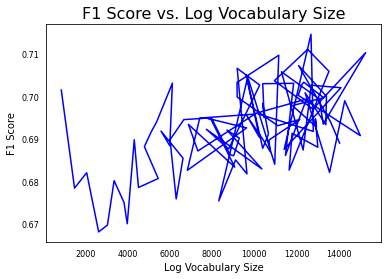

The best value of C is:  6.7 Max f1_score:  0.7146236181434897


In [8]:
def P6():
    # Keep this random seed here to make comparison easier.
    np.random.seed(0)

    ### STUDENT START ###
    
    # Creating vectorizer and fit/transform data:
    vectorizer = CountVectorizer()
    train_vect = vectorizer.fit_transform(train_data)
    dev_vect = vectorizer.transform(dev_data)
    
    # Creating Logistic Regression model, fit with trian data, predict with dev data. Checking accuracy with L2:
    clf7 = LogisticRegression(C=0.5, solver="liblinear", penalty = "l2", tol=0.015)
    clf7.fit(train_vect, train_labels)
    pred7 = clf7.predict(dev_vect)
    print("F1-score with Full vocabulary and c=0.5 and penalty=L2 is: ", round(metrics.f1_score(dev_labels, pred7, average='weighted'),4), "\n")
    
    print("F1-score of L2 with Pruned vocabulary by varying c of L1: ")
    # Iterating through a range of 'C' values, keeping track of respective accuracies and vocabulary sizes:
    c_values = [i*0.1 for i in range(1,100)]
    f1_score_list = []
    vocab_list = []
    for c in c_values:
        # Creating Logistic Regression model with L1, fit with trian data to prune the data:
        clf8 = LogisticRegression(C=c, solver="liblinear", penalty = "l1", tol=0.015)
        clf8.fit(train_vect, train_labels)
  
        # Grabbing all non-zero weights and calculate the vocaulary size:
        non_zero = clf8.coef_ != 0
        non_zero = np.any(non_zero, axis=0)
        #vocab_size = np.count_nonzero(clf8.coef_)
        #vocab_list.append(vocab_size)
        
        # Prunning train and dev vector data, keeping only features that have at least one non-zero weight:
        pruned_train_vect = train_vect[:,non_zero]
        pruned_dev_vect = dev_vect[:,non_zero]
        
        # Evalulate the pruned data with L2 logistic regression
        clf11 = LogisticRegression(C=0.5, solver="liblinear", penalty = "l2", tol=0.015)
        clf11.fit(pruned_train_vect, train_labels)
        pred11 = clf11.predict(pruned_dev_vect)
        f1_score = metrics.f1_score(dev_labels, pred11, average='weighted')
        f1_score_list.append(f1_score)


        vocab_size = np.count_nonzero(clf11.coef_)
        vocab_list.append(vocab_size)
        print("Value of C = ", c, "F1-score = ", round(f1_score,4), "Vocabulary Size: ", vocab_size)
    
    x1= vocab_list
    y_meas1= f1_score_list

    plt.plot(x1,y_meas1,'-b') 

    plt.title('F1 Score vs. Log Vocabulary Size', fontsize=16) 
    plt.xlabel("Log Vocabulary Size", fontsize=10)
    plt.ylabel("F1 Score", fontsize=10)
    # Set the x, y axis tick marks text size.
    plt.tick_params(
    axis='both',          # changes apply to the both-axis
    which='both',         # both major and minor ticks are affected
    bottom=False,         # ticks along the bottom edge are off
    top=False,            # ticks along the top edge are off
    left=False,           # ticks along the left edge are off
    right=False,          # ticks along the right edge are off
    labelsize=8)
    
    plt.show()
    
    max_f1_score = max(f1_score_list)
    index = f1_score_list.index(max_f1_score)
    best_c = index/10
    print("The best value of C is: ", best_c, "Max f1_score: ", max_f1_score) 

    ### STUDENT END ###
P6()

ANSWER:

After optimizing the pruning size, L2 have better F1-score with pruned data than full data. This suggests the full vocabulary must have some noisy features that is causing overfitting in the dev data. Interestingly, the graph shows a V shape, this suggests we need to be careful with pruning as they are local maxima. 

### Part 7:

How is `TfidfVectorizer` different than `CountVectorizer`?

Produce a Logistic Regression model based on data represented in tf-idf form, with L2 regularization strength of 100.  Evaluate and show the f1 score.  How is `TfidfVectorizer` different than `CountVectorizer`?

Show the 3 documents with highest R ratio, where ...<br/>
$R\,ratio = maximum\,predicted\,probability \div predicted\,probability\,of\,correct\,label$

Explain what the R ratio describes.  What kinds of mistakes is the model making? Suggest a way to address one particular issue that you see.

Note:
* Train on the transformed training data.
* Evaluate on the transformed development data.
* You can use `TfidfVectorizer` and its `.fit_transform` method to transform data to tf-idf form.
* You can use `LogisticRegression(C=100, solver="liblinear", multi_class="auto")` to produce a logistic regression model.
* You can use `LogisticRegression`'s `.predict_proba` method to access predicted probabilities.

In [23]:
def P7():
### STUDENT START ###

    # Using 'TfidfVectorizer' instead of 'CountVectorizer':
    vectorizer = TfidfVectorizer()
    train_vect = vectorizer.fit_transform(train_data)
    dev_vect = vectorizer.transform(dev_data)
    
    # Training a Logistic Regression Model with C=100:
    clf12 = LogisticRegression(C = 100,solver="liblinear", penalty = "l2")
    clf12.fit(train_vect, train_labels)
    pred12 = clf12.predict(dev_vect)
    print("F1-score with TfidfVectorizer and c=100 and penalty=L2 is: ", round(metrics.f1_score(dev_labels, pred12, average='weighted'),4), "\n") 
    # Grabbing specific predicted probabilities:
    pred_prob = clf12.predict_proba(dev_vect)
    pred_label = clf12.predict(dev_vect)
    
    correct_preds = []
    # Identifying the maximum predicted probability:
    max_prob = pred_prob.max(axis = 1)
    
    # Iterating through all predictions, keeping track of indexes for predicted probability, predicted labels
    # and actual label (to confirm predicted probabilities of correct labels):
    for i in range(676):
        prediction = pred12[i]
        predicted_probability = pred_prob[i][prediction]
        predict_label = dev_labels[i]
        
        #Calculating R:
        correct_preds.append(max_prob[i] / pred_prob[i][predict_label])
    correct_preds = np.asarray(correct_preds)
    
    # Identifying the top 3 documents:
    correct_preds_indexes = correct_preds.argsort()[-3:][::-1]
    
    print("Top 3 Documents are:")
    for index in correct_preds_indexes:
        
        print("\n", "Document in index ", index+1, " has R value of :", round(correct_preds[index],0), "\n")
        
        # Identifying the predicted vs real categories to understand errors model is making:
        print("Predicted Category: ", categories[pred_label[index]])
        print("Correct Category: ", categories[dev_labels[index]], "\n")
        print(dev_data[index])
        

## STUDENT END ###
P7()

F1-score with TfidfVectorizer and c=100 and penalty=L2 is:  0.7598 

Top 3 Documents are:

 Document in index  216  has R value of : 929.0 

Predicted Category:  talk.religion.misc
Correct Category:  sci.space 

I am pleased to announce that a *revised version* of _The Easy-to-Read Book
of Mormon_ (former title: _Mormon's Book_) by Lynn Matthews Anderson is now
available through anonymous ftp (see information below). In addition to the
change in title, the revised ETR BOM has been shortened by several pages
(eliminating many extraneous "that's" and "of's"), and many (minor) errors
have been corrected. This release includes a simplified Joseph Smith Story,
testimonies of the three and eight witnesses, and a "Words-to-Know"
glossary.

As with the previous announcement, readers are reminded that this is a
not-for-profit endeavor. This is a copyrighted work, but people are welcome
to make *verbatim* copies for personal use. People can recuperate the
actual costs of printing (paper, copy ce

ANSWER:

The TfidfVectorizer transforms a count matrix to a normalized tf or tf-idf representation. So although both the CountVectorizer and TfidfVectorizer (with use_idf=False) produce term frequencies, TfidfVectorizer is normalizing the count. Because TfidfVectorizer greatly reduces the effect of outliers (words with very high counts) by normalizing the features, TfidfVectorizer with default options produces a higher F1-score than CountVectorizer does (.7557 vs 0.7084) when testing on dev data. 

Similar to confusion matrix, higher the R ratios, higher the difference between our predicted probability and actual probability. Therefore we can use it spot samples where we made the most mistakes. 

Looking at the top 3 examples, one possible issue is that the model is incorrectly classifying because it is taking into consideration a single word instead of the entire text/context. For example, when this model sees the word "Mormon", is incorrecting classifying as "religion", when it is actually "sci.space". This is probably happening because a few key words are being used by the model to define a class (which can lead to errors such as these).

One way to address the problem is to use n-gram in order to expand the combinations of words the model uses to classify. This may add additional context to the words and help the model classify correctly.

### Part 8 EXTRA CREDIT:

Produce a Logistic Regression model to implement your suggestion from Part 7.

In [24]:
# One of my ideas was to increase ngram_range to increase contextual information to the data. 

# Using Preprocessing:
#ngram_range = (2,2) stop_words = 'english'
vectorizer = TfidfVectorizer(ngram_range = (1,2) )
train_vect = vectorizer.fit_transform(train_data)
dev_vect = vectorizer.transform(dev_data)
vocabulary_pre = vectorizer.get_feature_names()
print(len(vocabulary_pre))
#print(vocabulary_pre)

# Creating the same model and checking F1-score:
clf13 = LogisticRegression(C = 100,solver="liblinear", penalty = "l2")
clf13.fit(train_vect, train_labels)
pred13 = clf13.predict(dev_vect)
f1_score = metrics.f1_score(dev_labels, pred13, average='weighted')
print("F1-score, with better pre-processing: ", round(f1_score,4))

221770
F1-score, with better pre-processing:  0.7635


By adding bigram parameter in 'TfidfVectorizer', model's F1-score improved from 0.7598 in part 7 to 0.7635.